### Visualización de datos geoespaciales con Python

![SST NW México](assets/sst_nw_mex.png "SST NW México")

Guillermo Martínez Flores

Script original proporcionado por Milagro Urricariet

#### Librerías

- **Matplotlib**: grafica en coordenadas cartesianas (x, y)
- **Basemap**: fue la primera extensión de matplotlib para mapas, hoy está en desuso
- **Cartopy**: la librería actual recomendada; integra directamente con matplotlib y soporta múltiples proyecciones

#### Datos

Datos de temperatura superficial del mar (NetCDF), para un día en particular.

Fuente: https://data.remss.com/SST/daily/mw_ir/v05.1/netcdf/.

Archivo: `20251004120000-REMSS-L4_GHRSST-SSTfnd-MW_IR_OI-GLOB-v02.0-fv05.1.nc`


#### Instalación

Para instalar las librerías con `conda` puedes utilizar el siguiente comando y el archivo ``environment.yml``.

 ```bash
conda env create -f environment.yml -n geospatial
 ```

#### Notebook

Este notebook se basa en el spript compartido por xxx para introducir el uso de **Python** para visualizar datos espaciales, con énfasis en las librerías mencionadas arriba. 

Secciones del notebook:

[1. Importar librerías](#1-importar)</br>
[2. Abrir el archivo NetCDF seleccionando la variable y región de interés](#2-netcdf)</br>
[3. Visualización básica (Matplotlib) con algunos elementos del mapa](#3-matplotlin)</br>
[4. Visualización básica con Cartopy](#4-cartopy)</br>
[5. Visualización con Cartopy, proyección Miller con otros elementos de mapa](#5-cartopy-proyeccion)</br>
[6. Mapas de contornos](#contornos)</br>
[7. Mapa final incluyendo otras capas](#7-final)</br>

El notebook está pensado como una herramienta práctica para aprender y luego consultar cuando lo necesiten.

<a id="1-importar"></a>

#### 1. Importar librerías
---

In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cmocean
import numpy as np

<a id="2-netcdf"></a>

#### 2. Abrir el archivo NetCDF, seleccionando la variable y región de interés
---

In [3]:
# Región de interés
lonMin = -117
lonMax = -105
latMin =   20
latMax =   32

path = 'data/20251004120000-REMSS-L4_GHRSST-SSTfnd-MW_IR_OI-GLOB-v02.0-fv05.1.nc'
ds = xr.open_dataset(path)
# Seleccionamos la variable `analysed_sst` y la región de interés (20-32°N y -117-105°W)
sst_data = ds.analysed_sst.sel(lat=slice(latMin, latMax), lon = slice(lonMin, lonMax))
# Seleccionamos el primer tiempo del dataset para obtener una variable espacial 2D
sst = sst_data.isel(time=0) - 273  # Convertimos de Kelvin a Celsius

<a id="3-matplotlib"></a>

#### 3. Visualización básica (Matplotlib) con algunos elementos del mapa
---

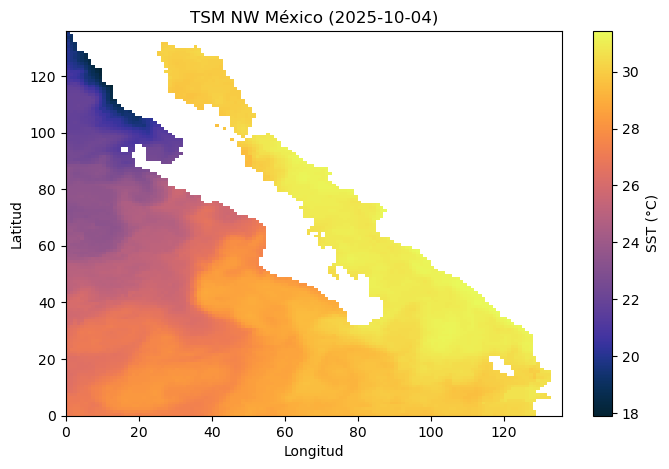

In [4]:
plt.figure(figsize=(8,5))
plt.pcolormesh(sst, cmap=cmocean.cm.thermal) 
plt.colorbar(label="SST (°C)")
plt.title(f"TSM NW México ({str(sst.time.values)[:10]})")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.show()

<a id="4-cartopy"></a>
#### 4. Visualización básica con Cartopy

Graficaremos el campo de temperatura en una proyección **PlateCarree** (la más simple) y agregaremos las líneas de costa.</p>
Nota: `transform=ccrs.PlateCarree()` indica que las coordenadas de los datos están en lat/lon. Esto es importante para que Cartopy proyecte correctamente los datos sobre la proyección del mapa.

---

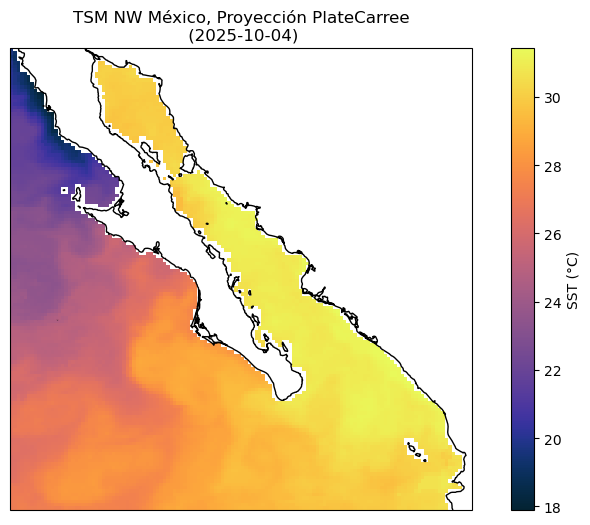

In [5]:
fig = plt.figure(figsize=(10,6))
ax = plt.axes(projection=ccrs.PlateCarree()) 
sst.plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(), cmap=cmocean.cm.thermal,
                    cbar_kwargs={'label': 'SST (°C)'})
ax.coastlines()
ax.set_title(f"TSM NW México, Proyección PlateCarree\n ({str(sst.time.values)[:10]})")
plt.show()

<a id="5-cartopy-proy"></a>
#### 5. Visualización con Cartopy, proyección Miller con otros elementos de mapa

La **proyección Miller** es similar a Mercator, pero corrige ligeramente la distorsión en latitudes altas. Útil para mapas globales.

Además, definimos los límites mínimo y máximo del plot para una mejor visualización.

Y agregaremos más herramientas de cartopy: con `add_feature()` y `ax.set_extent()`

---

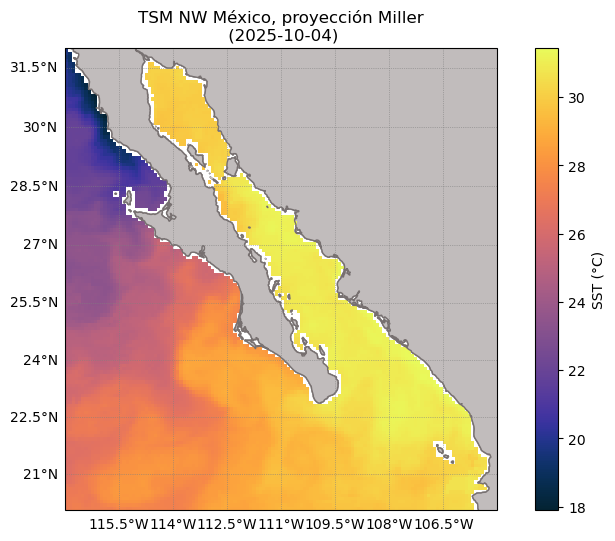

In [6]:
fig = plt.figure(figsize=(10,6))
ax = plt.axes(projection=ccrs.Miller()) 
sst.plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(), cmap=cmocean.cm.thermal, cbar_kwargs={'label': 'SST (°C)'})
ax.coastlines(color = "#777070", linewidth = 1)
ax.add_feature(cfeature.LAND, color = "#282424")

# Gridlines
gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='grey', linestyle=':')
gl.top_labels = False 
gl.right_labels = False
ax.add_feature(cfeature.LAND, color = "#C1BCBC")
ax.set_title(f"TSM NW México, proyección Miller\n ({str(sst.time.values)[:10]})")
plt.show()

<a id="contornos"></a>

#### 6. Mapas de contornos

- **contour**: dibuja sólo las líneas de contorno (isolíneas), sin color de relleno
- **contourf**: crea polígonos coloreados interpolando entre valores (útil para visualizar gradientes suaves)

---

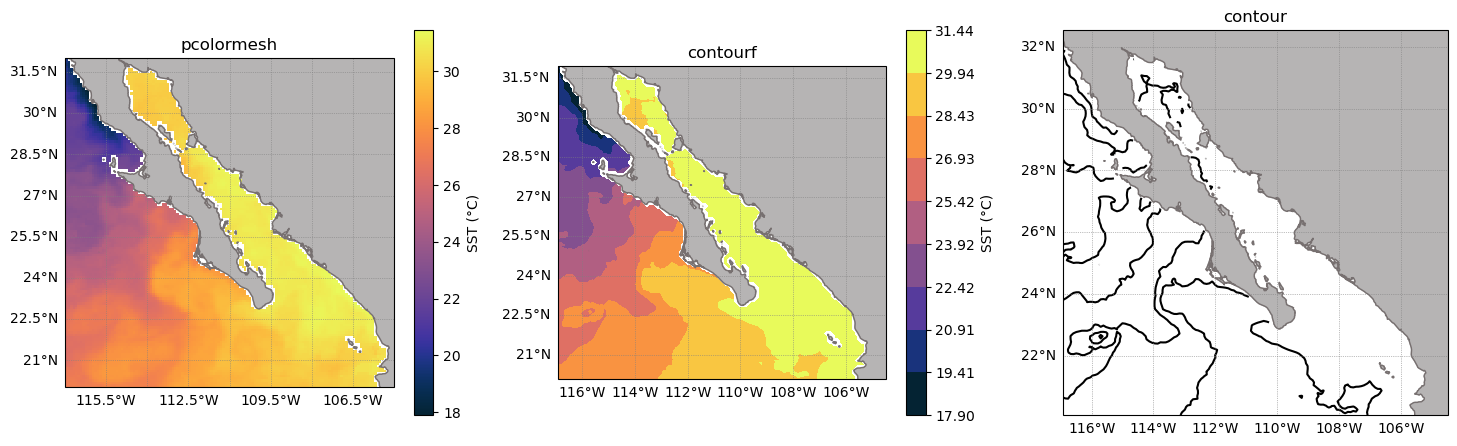

In [7]:
levelsContour = np.linspace(sst.min().values, sst.max().values,10)
levelsContour
fig, axes = plt.subplots(1,3, figsize=(18,5), subplot_kw={'projection': ccrs.PlateCarree()})

# pcolormesh
sst.plot.pcolormesh(ax=axes[0], cmap=cmocean.cm.thermal, cbar_kwargs={'label': 'SST (°C)'})
axes[0].coastlines(color = "#777070", linewidth = 1)
axes[0].add_feature(cfeature.LAND, color = "#B6B4B4")
gl = axes[0].gridlines(draw_labels=True, linewidth=0.5, color='grey', linestyle=':')
gl.top_labels = False
gl.right_labels = False
axes[0].set_title("pcolormesh")


# contourf
sst.plot.contourf(ax=axes[1], cmap=cmocean.cm.thermal, levels=levelsContour, cbar_kwargs={'label': 'SST (°C)'})
axes[1].coastlines(color = "#777070", linewidth = 1)
axes[1].add_feature(cfeature.LAND, color = "#B6B4B4")
gl = axes[1].gridlines(draw_labels=True, linewidth=0.5, color='grey', linestyle=':')
gl.top_labels = False
gl.right_labels = False
axes[1].set_title("contourf")

# contour
sst.plot.contour(ax=axes[2], levels=levelsContour, colors='black')
axes[2].coastlines(color = "#777070", linewidth = 1)
axes[2].add_feature(cfeature.LAND, color = "#B6B4B4")
gl = axes[2].gridlines(draw_labels=True, linewidth=0.5, color='grey', linestyle=':')
gl.top_labels = False
gl.right_labels = False
axes[2].set_title("contour")

plt.show()

<a id="7-final"></a>

#### 7. Mapa final incluyendo otras capas

---

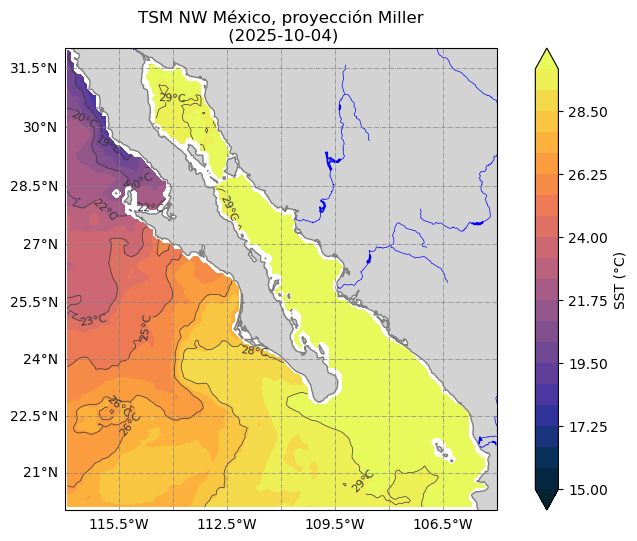

In [8]:
lon = sst.lon.values
lat = sst.lat.values

fig = plt.figure(figsize=(10,6))
ax = plt.axes(projection=ccrs.Miller())
ax.set_extent([lonMin, lonMax, latMin, latMax], crs=ccrs.PlateCarree())

ax.set_title(f"TSM NW México, proyección Miller\n ({str(sst.time.values)[:10]})")

# Definir niveles para contourf
levels_contourf = np.linspace(15, 30, 21)  # 21 niveles

# Contourf para colores
cf = ax.contourf(lon, lat, sst, levels=levels_contourf, transform=ccrs.PlateCarree(), cmap=cmocean.cm.thermal, extend='both')

# Contour para isotermas específicas
iso = ax.contour(lon, lat, sst, levels=levelsContour, colors="#363535", linewidths=0.5,transform=ccrs.PlateCarree())
ax.clabel(iso, fmt='%d°C', inline=True, fontsize=8)  # etiquetas en las isotermas

# Tierra con cfeature.LAND
ax.add_feature(cfeature.LAND, facecolor='lightgray', edgecolor='grey')
ax.add_feature(cfeature.LAKES, facecolor='lightblue', edgecolor='blue')
#ax.add_feature(cfeature.RIVERS, edgecolor='blue')

# Capa de ríos de Natural Earth (resolución 10m)
rivers_ne = cfeature.NaturalEarthFeature(
    category='physical',
    name='rivers_lake_centerlines',
    scale='10m',
    facecolor='none',
    edgecolor='blue'
)
ax.add_feature(rivers_ne, linewidth=0.5)

# Gridlines
gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='grey', linestyle='-.')
gl.top_labels = False
gl.right_labels = False

# Barra de colores
cb = plt.colorbar(cf, extend="both", orientation='vertical')
cb.set_label("SST (°C)")
plt.show()